# Contact quadratic harmonic oscillator
The contact quadratic harmonic oscillator presents the following Hamiltonian description:
$$ H = \frac{p^2}{2} + \frac{q^2}{2} + \gamma \frac{s^2}{2} - C, $$
where $\gamma$ and $C$ are two positive parameters. It presents also an Lagrangian description:
$$ L = \frac{\dot{q}^2}{2} - \frac{q^2}{2} - \gamma \frac{s^2}{2} + C. $$

In [1]:
import numpy as np
import scipy.optimize as so
import matplotlib.pylab as plt

plt.style.use('fast') #alt: 'seaborn-white'

#plt.rcParams.update({'font.size': 20, 'font.family': 'serif', 'font.weight':'normal'})
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = "serif"
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['mathtext.fontset'] = "cm"

In [2]:
from integrators.common import rk4
import integrators.contact as ci

In [3]:
class Osc:
    def __init__(self, γ, C=0):
        self.γ = γ
        self.C = C
    
    def V(self, x, t):
        return 0.5 * x**2 - self.C
    def Vq(self, x, t):
        return x
    def f(self, t):
        return self.γ

In [4]:
def XHquadsecond(x,C,γ,dt):
    p,q,s=x
    a=p + (1./24.)*(-γ*p**3 + 2*q*s*γ + p*(-2 + γ*(q**2 + 3*γ*s**2 - 2*C)))*dt**2
    b=(-q - p*s*γ) + (1/48)*(-4*γ*q**3 + p*s*(γ*q)**2 - 2*p*s*γ*(2 + 3*γ*p**2  + γ*C) + q*(-8 + γ*(-6*p**2 + γ*s**2 + 8*C)))*dt**2
    c=(p**2 - q**2 - s**2*γ)/2. + C + ((-8*q**2 - 3*p**4*γ + 2*p**2*(-2 + γ*(q**2 + 3*s**2*γ - 2*C)) - γ*(q**2 - 2*C)*(-2*q**2 + s**2*γ + 4*C))*dt**2)/96
    return([a,b,c])
    
def XHquadforth(x,C,γ,dt):
    a ,b, c= XHquadsecond(x,C,γ,dt)
    p,q,s=x
    a+= ((-9*p**5*γ**2 + 186*p**2*q*s*γ**2 - 4*q*s*γ*(-8 + γ*(q**2 + 5*s**2*γ - 2*C)) +
     -      3*p**3*γ*(-8 + 5*γ*(q**2 + 8*s**2*γ - 2*C)) -
     -      p*(16 + γ*(q**4*γ + 20*s**4*γ**3 + q**2*(-40 + 30*s**2*γ**2 - 4*γ*C) + 4*C*(-4 + γ*C) -
     -            30*s**2*γ*(1 + 2*γ*C))))*dt**4)/1920.
    b+= -  ((-24*q**5*γ**2 + 2*p*q**4*s*γ**3 + 4*p*q**2*s*γ**2*(18 + 15*p**2*γ - 2*γ*C) + 
     -       4*q**3*γ*(-48 + γ*(3*p**2 + s**2*γ + 24*C)) + 
     -       8*p*s*γ*(-8 + γ*(-15*p**4*γ + 5*s**2*γ + p**2*(-23 + 5*γ*(2*s**2*γ - 3*C)) + C*(-2 + γ*C))) - 
     -       q*(128 + γ*(139*p**4*γ + 8*s**2*γ*(-6 + γ*C) + 96*C*(-2 + γ*C) + 12*p**2*(12 - 15*s**2*γ**2 + 2*γ*C))))*
     -     dt**4)/3840.
    c+= -  ((-30*p**6*γ**2 - 8*q**6*γ**2 + 496*p**3*q*s*γ**2 + 9*p**4*γ*(-8 + 5*γ*(q**2 + 8*s**2*γ - 2*C)) + 
     -       8*γ**2*C**2*(s**2*γ + 8*C) + 2*q**4*γ*(-48 + s**2*γ**2 + 24*γ*C) - 
     -       8*q**2*(16 + γ*(s**2*γ*(-6 + γ*C) + 12*C*(-2 + γ*C))) - 
     -       2*p**2*(16 + γ*(q**4*γ + 20*s**4*γ**3 + q**2*(-40 + 30*s**2*γ**2 - 4*γ*C) + 4*C*(-4 + γ*C) - 
     -             30*s**2*γ*(1 + 2*γ*C))))*dt**4)/7680.
    return([a,b,c])

def XHquadsixth(x,C,γ,dt):
    a ,b, c= XHquadforth(x,C,γ,dt)
    p,q,s=x
    a+=-  ((-608*p**7*γ**3 + 28920*p**4*q*s*γ**3 + 84*p**5*γ**2*(-29 + 3*γ*(5*q**2 + 64*s**2*γ - 10*C)) + 
     -       48*p**2*q*s*γ**2*(446 + γ*(-223*q**2 - 606*s**2*γ + 446*C)) + 
     -       8*q*s*γ*(192 + γ*(36*q**4*γ + 112*s**4*γ**3 + q**2*(-320 + 3*γ*(49*s**2*γ - 48*C)) + 48*C*(1 + 3*γ*C) -
     -             14*s**2*γ*(16 + 21*γ*C))) + 
     -       2*p*(-256 + γ*(24*q**6*γ**2 + 560*s**6*γ**5 - 112*s**4*γ**3*(9 + 20*γ*C) - 
     -             64*C*(-6 + γ*C*(10 + 3*γ*C)) + q**4*γ*(441*s**2*γ**2 - 16*(83 + 9*γ*C)) + 
     -             84*s**2*γ*(8 + γ*C*(20 + 21*γ*C)) + 
     -             4*q**2*(384 + 280*s**4*γ**4 + 24*γ*C*(31 + 3*γ*C) - 3*s**2*γ**2*(790 + 147*γ*C)))) - 
     -       4*p**3*γ*(272 + γ*(147*q**4*γ + 12*q**2*(-304 + 7*γ*(33*s**2*γ - 7*C)) + 
     -             4*(924*s**4*γ**3 + C*(220 + 147*γ*C) - 6*s**2*γ*(179 + 231*γ*C)))))*dt**6)/430080.
    b+=+ ((-96*q**7*γ**3 + 4*p*q**6*s*γ**4 - p*q**4*s*γ**3*(784 + 441*p**2*γ + 24*γ*C) + 
     -       12*q**5*γ**2*(-172 + γ*(-18*p**2 + s**2*γ + 48*C)) + 
     -       4*p*q**2*s*γ**2*(1200 + γ*(693*p**4*γ - 623*s**2*γ + 4*C*(116 + 3*γ*C) + 
     -             p**2*(3708 + 7*γ*(-80*s**2*γ + 63*C)))) - 
     -       2*q**3*γ*(2304 + γ*(-1039*p**4*γ + 3*p**2*(-656 + 9*γ*(49*s**2*γ - 16*C)) + 
     -             8*(s**2*γ*(8 + 3*γ*C) + 8*C*(-43 + 9*γ*C)))) + 
     -       2*q*(-768 + γ*(-1551*p**6*γ**2 - 182*s**4*γ**3 + 2*p**4*γ*(-1804 + 4329*s**2*γ**2 - 1039*γ*C) + 
     -             8*s**2*γ*(60 + γ*C*(8 + 3*γ*C)) + 32*C*(48 + γ*C*(-43 + 12*γ*C)) - 
     -             6*p**2*(280*s**4*γ**4 + 24*(1 + γ*C)*(8 + 3*γ*C) - 3*s**2*γ**2*(338 + 147*γ*C)))) + 
     -       4*p*s*γ*(-192 + γ*(-672*p**6*γ**2 + 3*p**4*γ*(-599 + 154*γ*(4*s**2*γ - 3*C)) - 
     -             p**2*(1060 + 420*s**4*γ**4 - 4*s**2*γ**2*(429 + 280*γ*C) + γ*C*(1312 + 441*γ*C)) - 
     -             2*(56*s**4*γ**3 - 7*s**2*γ*(16 + 21*γ*C) + 4*C*(6 + γ*C*(18 + γ*C))))))*dt**6)/215040.
    c+= -  ((-532*p**8*γ**3 + 23136*p**5*q*s*γ**3 - 32*p**3*q*s*γ**2*(-446 + γ*(223*q**2 + 606*s**2*γ - 446*C)) + 
     -       70*p**6*γ**2*(-29 + 3*γ*(5*q**2 + 64*s**2*γ - 10*C)) - 
     -       3*p**4*γ*(272 + γ*(147*q**4*γ + 12*q**2*(-304 + 7*γ*(33*C*γ - 7*C)) + 880*C + 
     -             12*γ*(308*s**4*γ**2 + 49*C**2 - 2*s**2*(179 + 231*γ*C)))) + 
     -       4*(-6*q**8*γ**3 - 8*γ**3*C**3*(s**2*γ + 12*C) + q**6*γ**2*(-172 + s**2*γ**2 + 48*γ*C) - 
     -          2*q**4*γ*(288 + γ*(s**2*γ*(8 + 3*γ*C) + 8*C*(-43 + 9*γ*C))) + 
     -          q**2*(-384 + γ*(-91*s**4*γ**3 + 4*s**2*γ*(60 + γ*C*(8 + 3*γ*C)) + 16*C*(48 + γ*C*(-43 + 12*γ*C)))))\
     -        + p**2*(-256 + γ*(24*q**6*γ**2 + 560*s**6*γ**5 - 112*s**4*γ**3*(9 + 20*γ*C) - 
     -             64*C*(-6 + γ*C*(10 + 3*γ*C)) + q**4*γ*(441*s**2*γ**2 - 16*(83 + 9*γ*C)) + 
     -             84*s**2*γ*(8 + γ*C*(20 + 21*γ*C)) + 
     -             4*q**2*(384 + γ*(280*s**4*γ**3 + 24*C*(31 + 3*γ*C) - 3*s**2*γ*(790 + 147*γ*C))))))*dt**6)/430080.
    return([a,b,c])

# Contact integrators

The integrator for the quadratic oscillator case is implicit. You can see the implementations below.

In [5]:
def quadratic_v(init, tspan, γ, C=0):
    p0, q0, s0 = init
    osc = Osc(γ, C)
    return ci.integrate(ci.variational_step_quadratic, osc, tspan, p0, q0, s0)

def quadratic_h(init, tspan, γ, C=0):
    p0, q0, s0 = init
    osc = Osc(γ, C)
    return ci.integrate(ci.step1q, osc, tspan, p0, q0, s0)

# Euler-type integrators

In [6]:
osc = lambda p,x,z,t,γ: -x-γ*p*z

def rk4s(init, tspan, γ, h, acc, C=0):
    t = tspan
    lag = lambda p,q,z: p**2/2.0 - q**2/2.0 + C - γ*z**2/2.0
    def derivs(x,t):
        dp = acc(x[0],x[1],x[2],0,γ)
        dq = x[0]
        dz = lag(x[0],x[1],x[2])
        return (dp, dq, dz)
    return rk4(derivs, init, t)

#explicit midpoint
def midpoint(init, tspan, γ, h, acc, C=0):
    steps = len(tspan)
    hsq = np.math.pow(h,2)
    lacc = lambda p,q,z: acc(p,q,z,0,γ)
    lag = lambda p,q,z: p**2/2.0 - q**2/2.0 + C - γ*z**2/2.0
    
    sol = np.empty([steps, 3], dtype=np.float64)
    sol[0] = np.array(init)
    for i in range(steps-1):
        p,x,z = sol[i]
        half = h/2.0
        pmid = p + half*lacc(p, x, z)
        xmid = x + half*p
        zmid = z + half*lag(p, x, z)
        
        pnew = p + h*lacc(pmid, xmid, zmid)
        xnew = x + h*pmid
        znew = z + h*lag(pmid, xmid, zmid)
        sol[i+1] = np.array([pnew, xnew, znew])
    return sol

# Symplectic integrators (hand adapted)

In this case symplectic integrators cannot be applied as-is. One should introduce a dummy variable to make the system even-dimensional again. Below we add some hand crafted implementations for the comparisons.

_Note that the comparison will not be very meaningful in this case, so we decided to omit it from the paper._

In [7]:
def leapfrog(init, tspan, γ, h, acc):
    steps = len(tspan)
    hsq = np.math.pow(h,2)
    lacc = lambda p,q,z: acc(p,q,z,0,γ)
    
    sol = np.empty([steps, 3], dtype=np.float64)
    sol[0] = np.array(init)
    for i in range(steps-1):
        p,x,z = sol[i]
        xnew = x + h*p + hsq/2.0*lacc(p, x, z)
        znew, = so.fsolve(
            lambda znew: z - znew + h*(.5*((xnew-x)/h)**2 - .25*(x**2 + xnew**2) - .25*γ*(z**2 + znew**2))
            , z
        )
        pnew = p + h*(lacc(p, x, z) + lacc(p, xnew, znew))/2.0
        sol[i+1] = np.array([pnew, xnew, znew])
    
    return sol

In [8]:
def relerr(ref, sol, shift=10.0):
    """
    Regularized relative error between the reference solution
    and the approximation: abs((shift+sol)/(shift+ref)-1.0)
    As the solutions that we are going to discuss have often a very
    small magnitude, we shift the solutions from 0 to avoid division
    by zero errors. We chose this function to emphasize the relative
    size of the error compared to the solution.
    """
    return np.abs((shift+sol)/(shift+ref)-1.0)/3.0

In [9]:
def cmp_plot(init, tspan, γ, h, delta, acc=osc, save=False, full=False):
    
    t0, tf = tspan
    ts = np.arange(t0, tf, h)
    tsfine = np.arange(t0, tf, h/delta)
    
    r = rk4s(init, tsfine, γ, h/delta, acc)

    s1pq, s1s, _ = quadratic_v(init, ts, γ)
    s2pq, s2s, _ = quadratic_h(init, ts, γ)
    s4 = midpoint(init, ts, γ, h, acc)
    
    if full:
        s3 = ci.vaariational_quadratic_implicit(init, ts, γ, h)
        s5 = leapfrog(init, ts, γ, h, acc)
    
    # This may be needed when the time step or the delta are not even
    rtrim = r[::delta,1]
    rtrim = rtrim[:len(ts)]
    r2trim = r[::delta,2]
    r2trim = r2trim[:len(ts)]
        
    plt.figure(figsize=(20,20))    
    
    plt.subplot(411)
    plt.title("Solution for $h={}$, $\\gamma={}$, $(p_0,q_0,z_0)={}$".
              format(h, γ, tuple(init))
             )
    plt.plot(ts, s1pq[:,1], label="Contact (1st)", linestyle="--", linewidth=.5)
    if full:
        plt.plot(ts, s3[:,1], label="Contact (2nd)", linestyle="-.", linewidth=.5)
    plt.plot(ts, s2pq[:,1], label="Contact (H 2nd)", linestyle="--", linewidth=.5)
    plt.plot(ts, s4[:,1], label="Explicit midpoint (2nd)", linestyle=":", linewidth=.8)
    if full:
        plt.plot(ts, s5[:,1], label="Leapfrog", linestyle=":", linewidth=.5)
    plt.plot(tsfine[:len(r[:,1])], r[:,1], label="Reference", linestyle="-", linewidth=.5)
    plt.legend()
    plt.xlabel("$t$")
    plt.ylabel("$q$")
    
    plt.subplot(412)
    #plt.title("Momentum")
    plt.plot(ts, s1pq[:,0], label="Contact (1st)", linestyle="--", linewidth=.5)
    if full:
        plt.plot(ts, s3[:,0], label="Contact (2nd)", linestyle="-.", linewidth=.5)
    plt.plot(ts, s2pq[:,0], label="Contact (H 2nd)", linestyle="--", linewidth=.5)
    plt.plot(ts, s4[:,0], label="Explicit midpoint (2nd)", linestyle=":", linewidth=.8)
    if full:
        plt.plot(ts, s5[:,0], label="Leapfrog", linestyle=":", linewidth=.5)
    plt.plot(tsfine[:len(r[:,0])], r[:,0], label="Reference", linestyle="-", linewidth=.5)
    plt.legend()
    plt.xlabel("$t$")
    plt.ylabel("$p$")
    
    plt.subplot(413)
    #plt.title("z-component")
    plt.plot(ts, s1s, label="Contact (1st)", linestyle="--", linewidth=.5)
    if full:
        plt.plot(ts, s3[:,2], label="Contact (2nd)", linestyle="-.", linewidth=.5)
    plt.plot(ts, s2s, label="Contact (H 2nd)", linestyle="-", linewidth=.5)
    plt.plot(ts, s4[:,2], label="Explicit midpoint (2nd)", linestyle=":", linewidth=.8)
    if full:
        plt.plot(ts, s5[:,2], label="Leapfrog", linestyle=":", linewidth=.5)
    plt.plot(tsfine[:len(r[:,2])], r[:,2], label="Reference", linestyle="-", linewidth=.5)
    plt.legend()
    plt.xlabel("$t$")
    plt.ylabel("$s$")
    
    plt.subplot(414)
    plt.title("Error")
    plt.plot(ts, relerr(rtrim,s1pq[:,1]) + relerr(rtrim,s1pq[:,0]) +  relerr(r2trim,s1s), label="Contact (1st)", linestyle="--", linewidth=.5)
    if full:
        plt.plot(ts, relerr(rtrim,s3[:,1]) + relerr(rtrim,s3[:,0]) + relerr(r2trim,s3[:,2]), label="Contact (2nd)", linestyle="-.", linewidth=.5)
    plt.plot(ts, relerr(rtrim,s2pq[:,1]) + relerr(rtrim,s2pq[:,0]) + relerr(r2trim,s2s), label="Contact (H 2nd)", linestyle="-", linewidth=.5)
    plt.plot(ts, relerr(rtrim,s4[:,1]) + relerr(rtrim,s4[:,0]) + relerr(r2trim,s4[:,2]), label="Explicit midpoint (2nd)", linestyle=":", linewidth=.8)
    if full:
        plt.plot(ts, relerr(rtrim,s5[:,1]) + relerr(rtrim,s5[:,0]) + relerr(r2trim,s5[:,2]), label="Leapfrog", linestyle=":", linewidth=.5)
    plt.legend()
    plt.xlabel("$t$")
    plt.ylabel("Relative error")
    
    if save:
        name = "images/quadratic{}.pdf".format(a)
        plt.savefig(name, format="pdf", transparent=True, bbox_inches='tight')

    plt.show()

# Examples of comparisons between contact Hamiltonian, contact variational and different references.

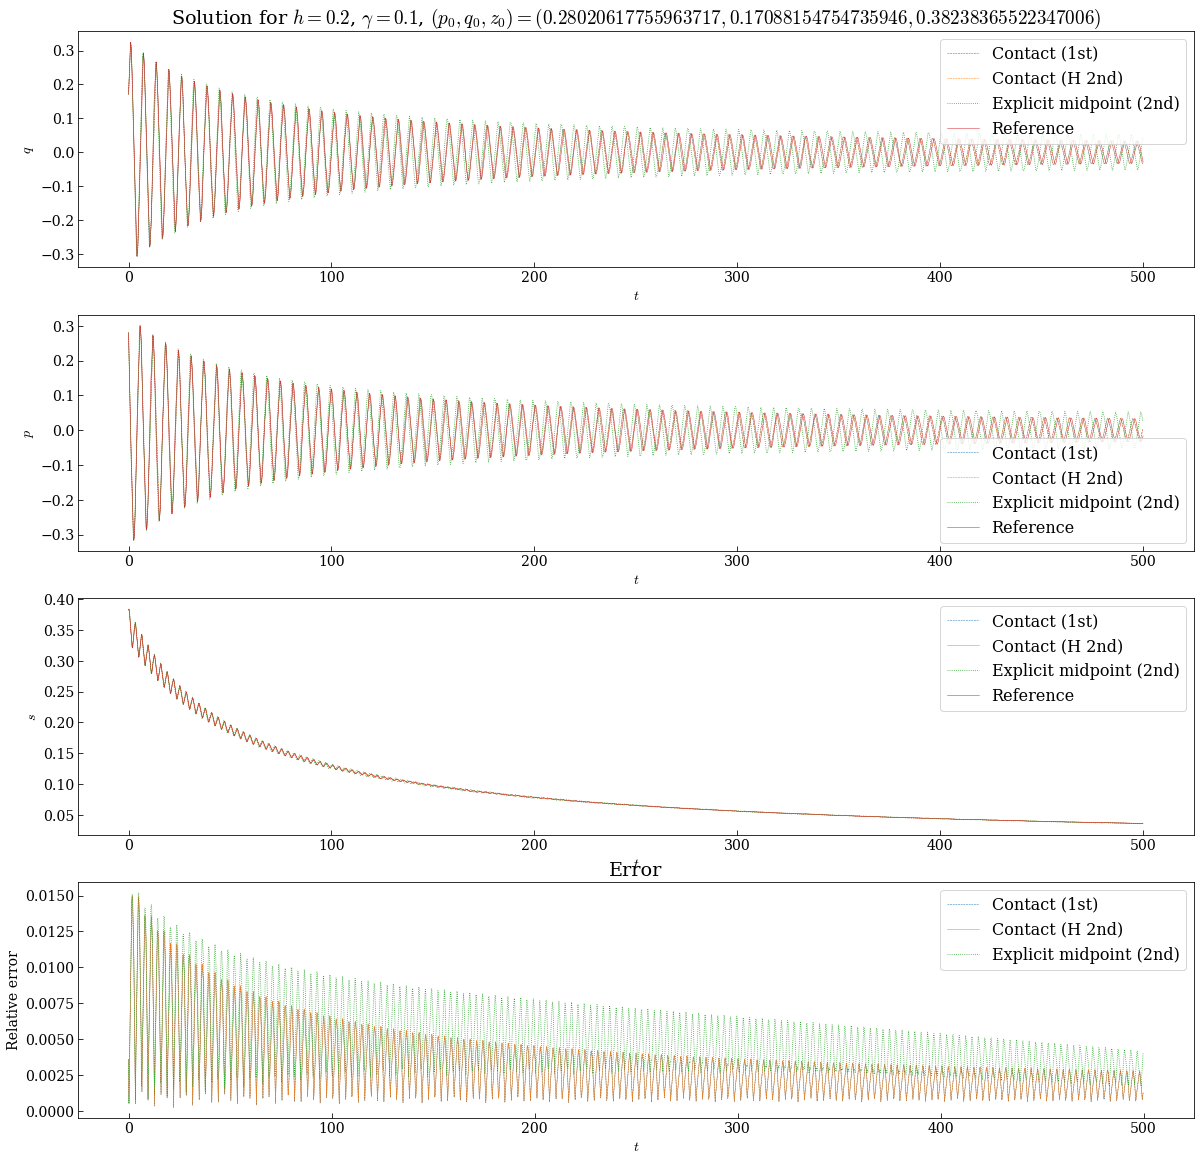

In [10]:
#init = (.5, -.7, -.2)
init = .5*np.random.rand(3)
tspan = (0.0, 500.0)
a = .1
h = 0.2
delta = 10

cmp_plot(init, tspan, a, h, delta)

#quadratic(init, np.arange(0.0, 50.0, 0.3), a, 0.2)

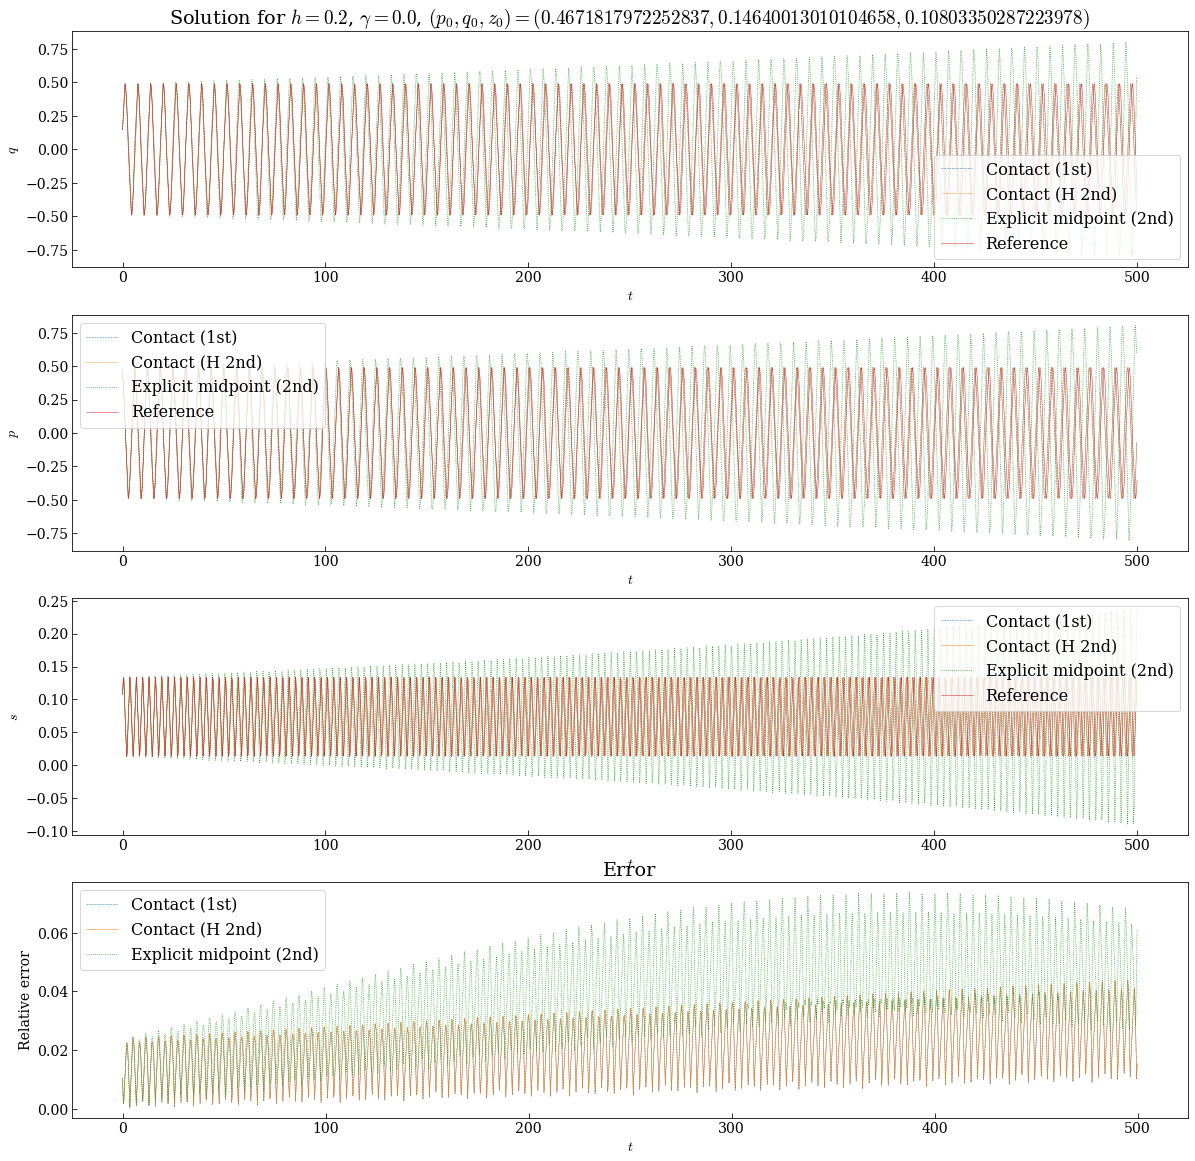

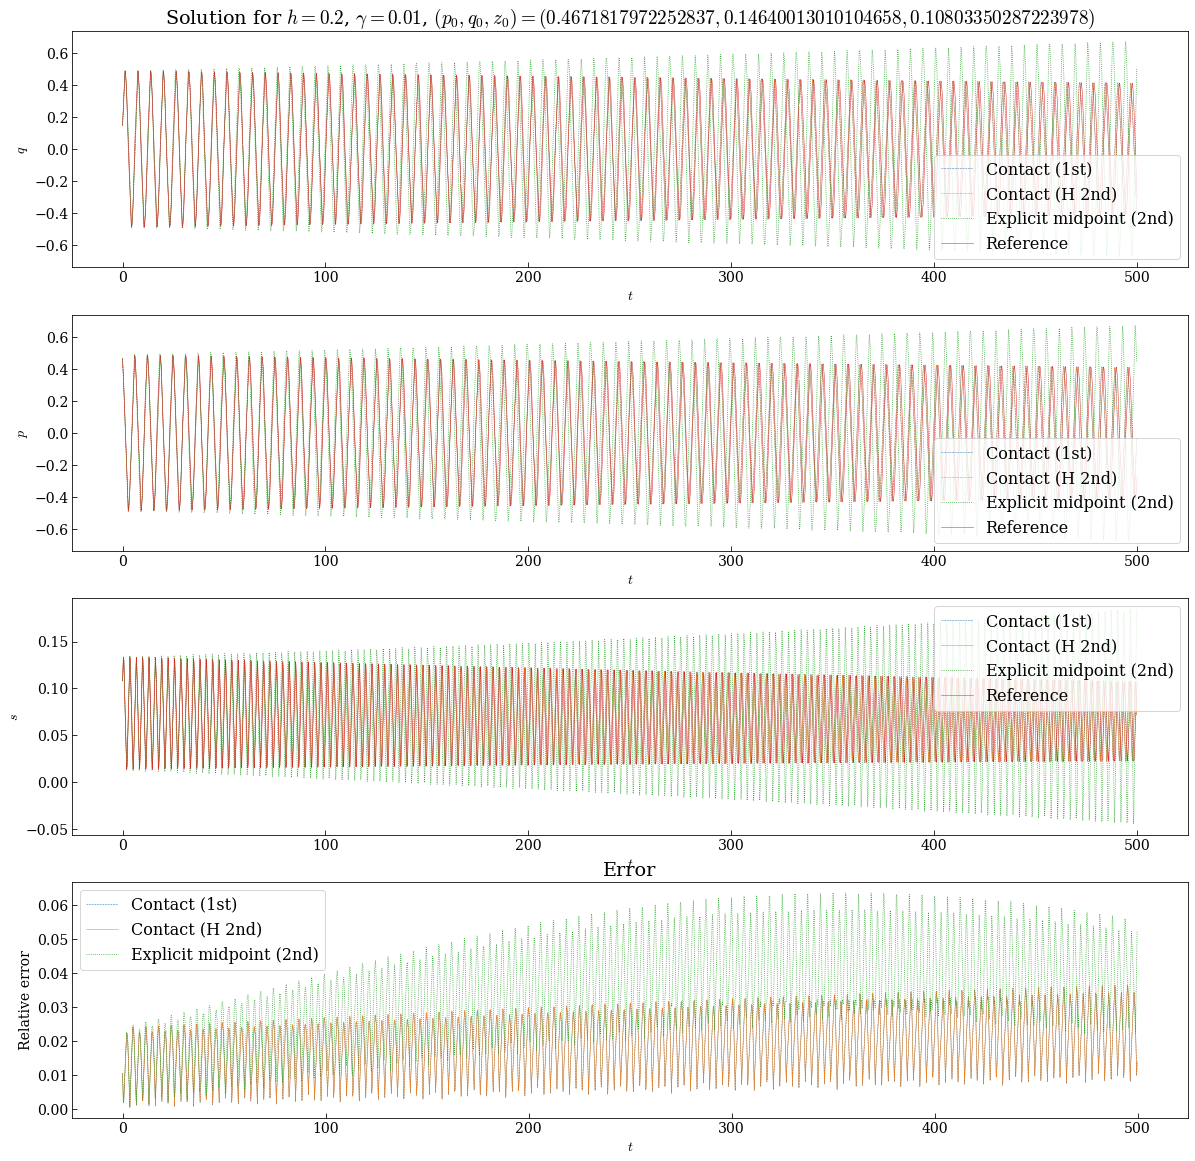

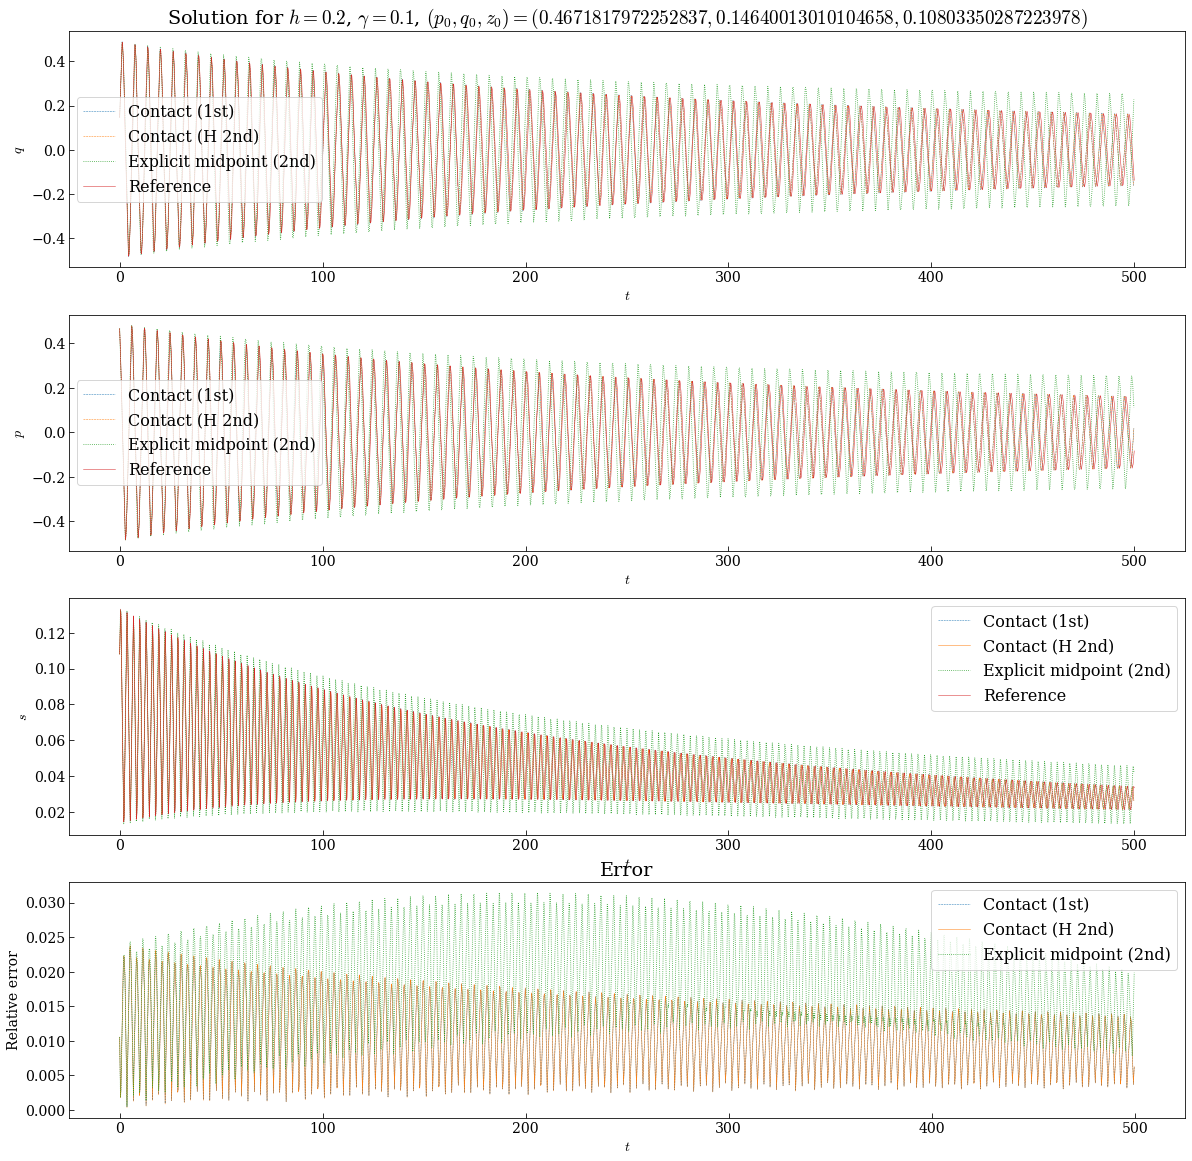

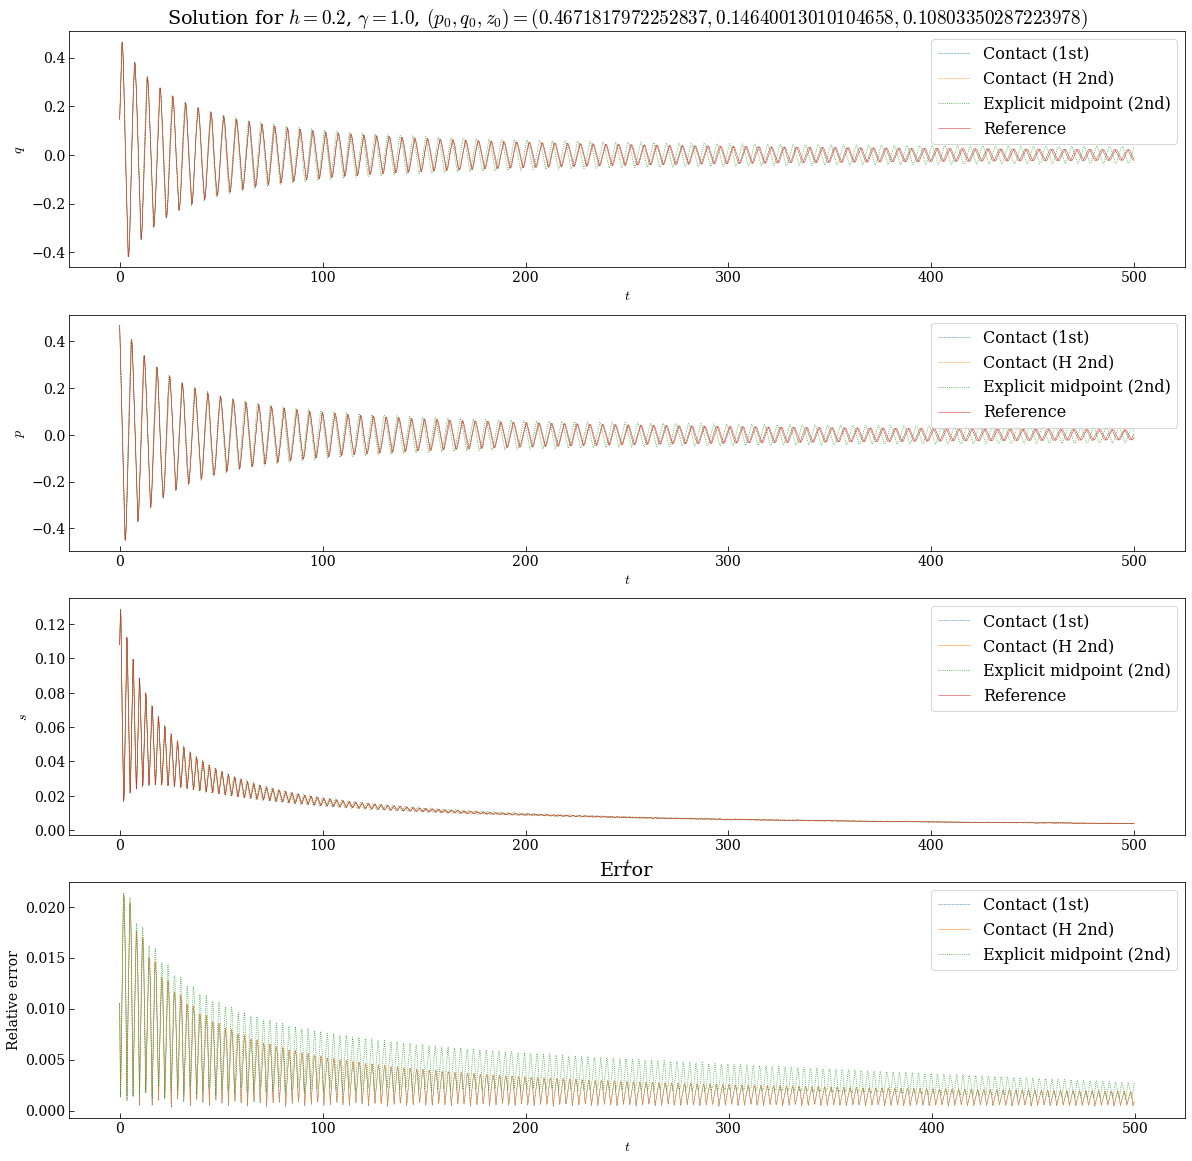

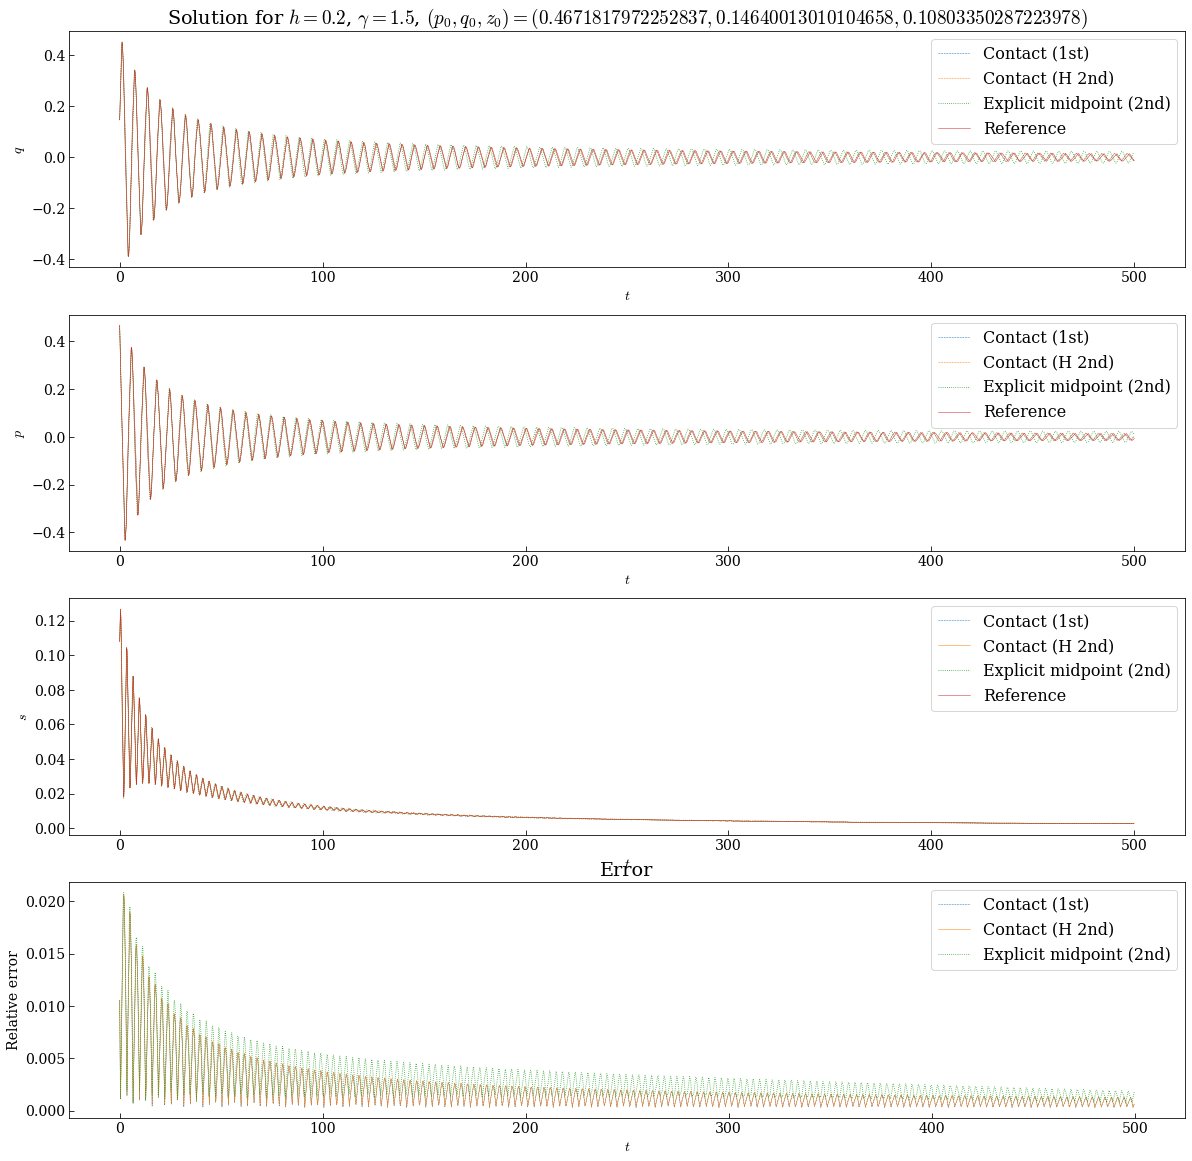

In [11]:
init = 0.5*np.random.rand(3)
#init = (.5, -.7, .2)
tspan = (0.0, 500.0)
delta = 10
    
for a in [0.0, 0.01, 0.1, 1.0, 1.5]:
    for h in [.2]:
        cmp_plot(init, tspan, a, h, delta)

# Variational simulations around $H^{-1}(0)$ surface

In [12]:
t0, tf = (0., 50.)
h = 0.1
a = 1.0
C = 18
ts = np.arange(t0, tf, h)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


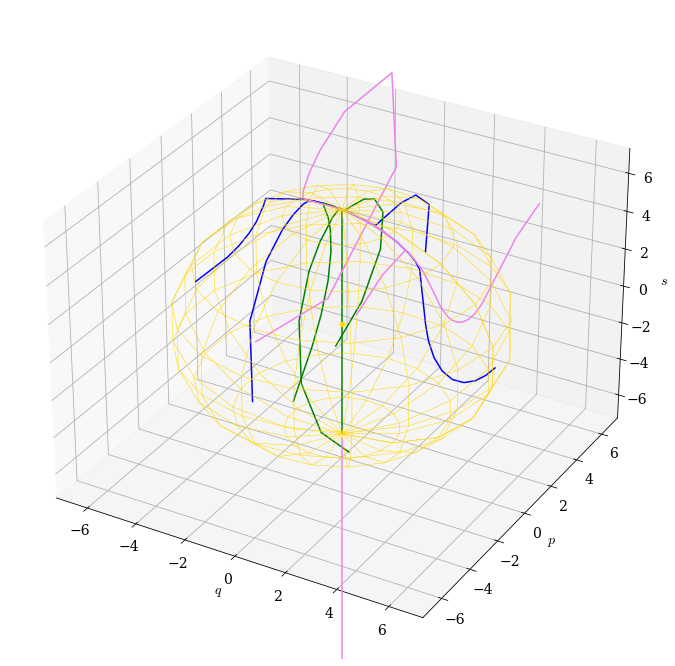

In [20]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

for init in [
    #(2, -3, -2), (2, 0, -2), (-2, 1, -3)
     (0,0,6), (0,0,-6), (6,0,0), (0,6,0)
    , (-6, 0, 0) , (0, -6, 0)
    , (0,0,-5.9)
    , (0,-2,-5), (3,-2,-4), (-3,2,-4)
    , (5,5,5), (4, -6, -6), (-6, 4, 6)
    , (0,0, -6.2)
    ]:
    sol, sols, _ = quadratic_v(init, ts, a, C=C)
    x,y,z = init
    n = x**2 + y**2 + z**2
    if n == 36:
        color="blue"
    elif n < 36:
        color="green"
    else:
        color="violet"
    ax.plot(sol[:,1], sol[:,0], sols, label="({},{},{})".format(*init), color=color, linewidth=1.5)
    #solm = midpoint(init, ts, a, h, acc=osc, C=C)
    #ax.plot(solm[:,1], solm[:,0], solm[:,2], color="b", linewidth=0.1)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.sqrt(2.*C)*np.cos(u)*np.sin(v)
y = np.sqrt(2.*C)*np.sin(u)*np.sin(v)
z = np.sqrt(2.*C)*np.cos(v)
ax.plot_wireframe(x, y, z, color="gold", linewidth=0.5)

ax.scatter([0],[0],[0], color="gold")

ax.set_xlabel('$q$')
ax.set_ylabel('$p$')
ax.set_zlabel('$s$')
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_zlim(-7,7)

#plt.legend()
plt.savefig("images/spherevar.pdf", transparent=True, bbox_inches='tight')
plt.show()

# Hamiltonian simulations around $H^{-1}(0)$ surface

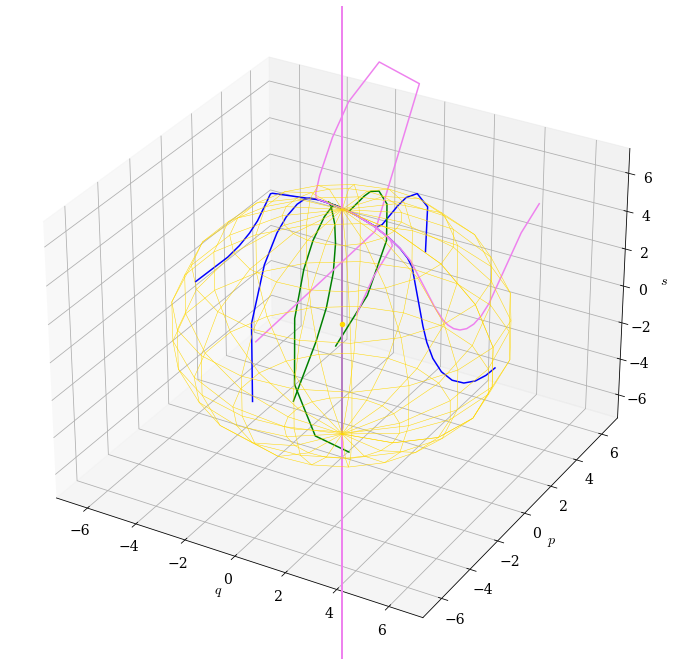

In [21]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

for init in [
    #(2, -3, -2), (2, 0, -2), (-2, 1, -3)
     (0,0,6), (0,0,-6), (6,0,0), (0,6,0)
    , (-6, 0, 0) , (0, -6, 0)
    , (0,0,-5.9)
    , (0,-2,-5), (3,-2,-4), (-3,2,-4)
    , (5,5,5), (4, -6, -6), (-6, 4, 6)
    , (0,0, -6.2)
    ]:
    sol, sols, _ = quadratic_h(init, ts, a, C=C)
    x,y,z = init
    n = x**2 + y**2 + z**2
    if n == 36:
        color="blue"
    elif n < 36:
        color="green"
    else:
        color="violet"
    ax.plot(sol[:,1], sol[:,0], sols, label="({},{},{})".format(*init), color=color, linewidth=1.5)
    #solm = midpoint(init, ts, a, h, acc=osc, C=C)
    #ax.plot(solm[:,1], solm[:,0], solm[:,2], color="b", linewidth=0.1)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.sqrt(2.*C)*np.cos(u)*np.sin(v)
y = np.sqrt(2.*C)*np.sin(u)*np.sin(v)
z = np.sqrt(2.*C)*np.cos(v)
ax.plot_wireframe(x, y, z, color="gold", linewidth=0.5)

ax.scatter([0],[0],[0], color="gold")

ax.set_xlabel('$q$')
ax.set_ylabel('$p$')
ax.set_zlabel('$s$')
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_zlim(-7,7)

#plt.legend()
plt.savefig("images/sphereham.pdf", transparent=True, bbox_inches='tight')
plt.show()

# Comparisons between Runge-Kutta 4, Contact Variational Integrator (order 2), and contact Hamiltonian Integrator (order 2) in stiff initial condition

<ipython-input-6-59b1d20fe336>:1: RuntimeWarning: overflow encountered in double_scalars
  osc = lambda p,x,z,t,γ: -x-γ*p*z
<ipython-input-6-59b1d20fe336>:5: RuntimeWarning: overflow encountered in double_scalars
  lag = lambda p,q,z: p**2/2.0 - q**2/2.0 + C - γ*z**2/2.0
<ipython-input-6-59b1d20fe336>:5: RuntimeWarning: invalid value encountered in double_scalars
  lag = lambda p,q,z: p**2/2.0 - q**2/2.0 + C - γ*z**2/2.0


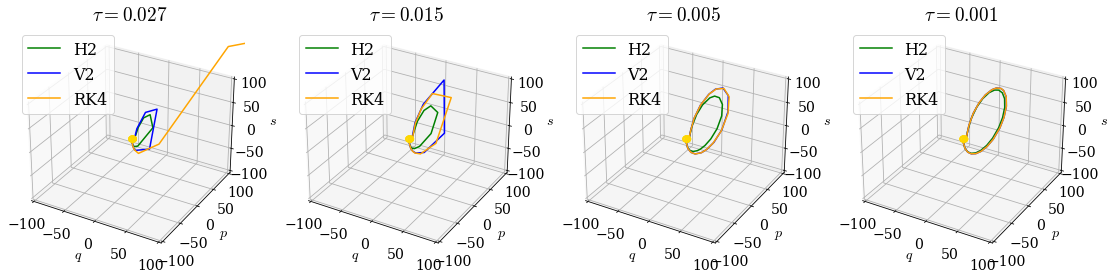

(q,p,s)=(0,-1,-7)


In [15]:
init = (0, -1, -7)
fig = plt.figure(figsize=(24,6))

for i, dt in enumerate([.027, .015, .005, .001]):
    ax = fig.add_subplot(1, 5, i+1, projection='3d')
    
    tsl = np.arange(t0, tf/10, dt)
    solh, solsh, _ = quadratic_h(init, tsl, a, C=C)
    ax.plot(solh[:,1], solh[:,0], solsh, label="H2", color="green")
    sol, sols, _ = quadratic_v(init, tsl, a, C=C)
    ax.plot(sol[:,1], sol[:,0], sols, label="V2", color="blue")
    solm = rk4s(init, tsl, a, h, acc=osc, C=C)
    ax.plot(solm[:,1], solm[:,0], solm[:,2], label="RK4", color="orange")

    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.sqrt(2.*C)*np.cos(u)*np.sin(v)
    y = np.sqrt(2.*C)*np.sin(u)*np.sin(v)
    z = np.sqrt(2.*C)*np.cos(v)
    ax.plot_wireframe(x, y, z, color="gold", linewidth=0.5)

    ax.scatter([0],[0],[0], color="gold")

    ax.set_xlabel('$q$')
    ax.set_ylabel('$p$')
    ax.set_zlabel('$s$')
    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)
    ax.set_zlim(-100,100)
    ax.set_title("$\\tau={}$".format(dt))
    
    plt.legend()

plt.savefig("images/sph-{}_{}_{}.pdf".format(*init), transparent=True, bbox_inches='tight')
plt.show()
print("(q,p,s)=({},{},{})".format(*init))

# Study equilibria for Hamiltonian Integrator

The equilibria of the quadratic Hamiltonian are given by:
$$ x_{1,2} = \left( 0, 0, \pm \sqrt{\frac{2 C}{\gamma}}\right),$$
while the equilibria of the stepper are given by:
$$ x_{1,2} = \left( 0, 0, \pm \frac{\sqrt{8 C + dt^2 \gamma C^2}}{2 \sqrt{\gamma}}\right) $$

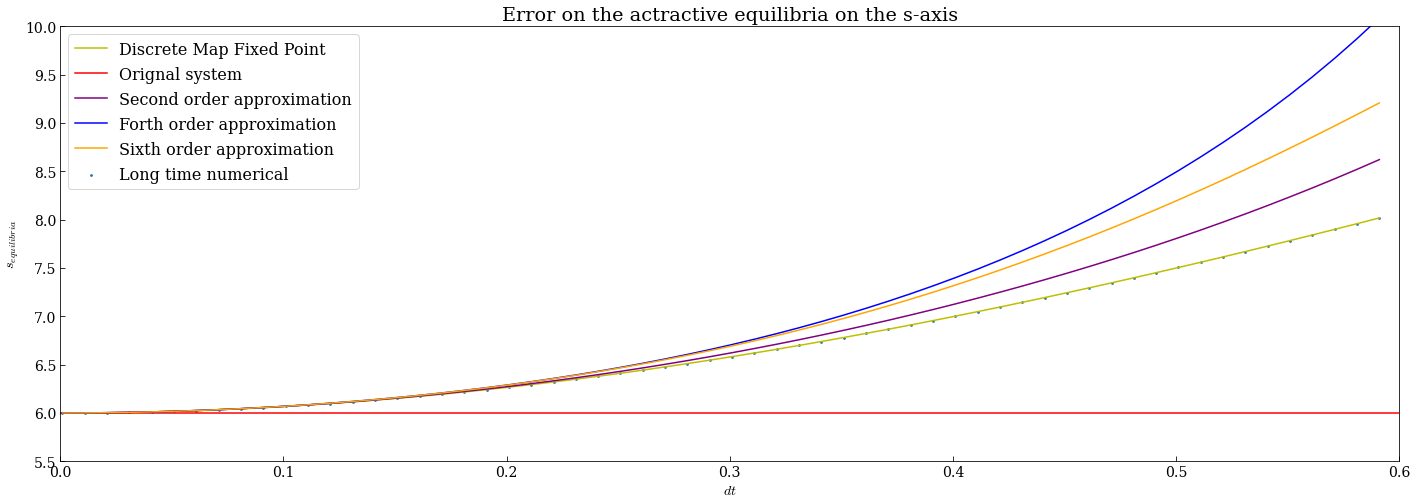

In [16]:
fig = plt.figure(figsize=(24,8))
dtf=0.6
dtspan=np.arange(0.001,dtf,0.01)
ndt=len(dtspan)
seqn= np.empty(ndt, dtype=np.float64)
seqndis = np.empty(ndt, dtype=np.float64)
seqnsec = np.empty(ndt, dtype=np.float64)
seqnfor = np.empty(ndt, dtype=np.float64)
seqnsix = np.empty(ndt, dtype=np.float64)
init=[0.1,0.1,7.]
C=18
a=1
def eqnex(C,γ):
    return(np.sqrt(2*C/γ))

def eqndis(C,γ,dt):
    return(np.sqrt(8*C+γ*(dt*C)**2)/(2*np.sqrt(γ)))
eqndis1 = lambda dt: eqndis(C,a,dt)

for i,dt in enumerate(dtspan):
    XH2= lambda x :XHquadsecond(x,C,a,dt)
    XH4= lambda x :XHquadforth(x,C,a,dt)
    XH6= lambda x :XHquadsixth(x,C,a,dt)
    tspan=np.arange(0.,1000,dt)
    solh, solsh, _ = quadratic_h(init, tspan, a, C=C)
    seqn[i]=solsh[-1]
    seqndis[i]=eqndis1(dt)
    seqnsec[i]=so.fsolve(XH2, [0,0,eqnex(C,a)])[2]
    seqnfor[i]=so.fsolve(XH4, [0,0,eqnex(C,a)])[2]
    seqnsix[i]=so.fsolve(XH6, [0,0,eqnex(C,a)])[2]
    print("Step : ", i+1,"/", ndt+1, end="\r")
    
plt.title("Error on the actractive equilibria on the s-axis")
plt.scatter(dtspan, seqn,s=3, label="Long time numerical")
plt.plot(dtspan, seqndis, color='y', label="Discrete Map Fixed Point")
plt.axhline(y = eqnex(C,a), color = 'r', linestyle = '-', label = "Orignal system")
plt.plot(dtspan, seqnsec, color='purple', label="Second order approximation")
plt.plot(dtspan, seqnfor, color='blue', label="Forth order approximation")
plt.plot(dtspan, seqnsix, color='orange', label="Sixth order approximation")

plt.xlim(0.,dtf)
plt.ylim(5.5,10)
plt.xlabel("$dt$")
plt.ylabel("$s_{equilibria}$")
plt.legend()
plt.savefig("images/attequiposition.pdf", transparent=True, bbox_inches='tight')
plt.show()

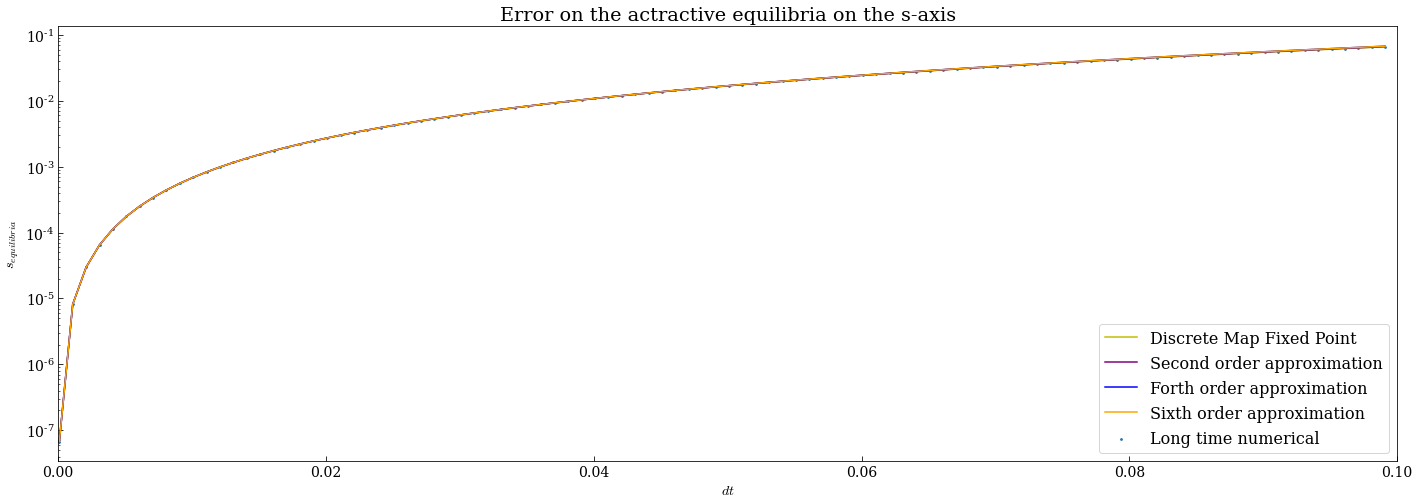

In [17]:
fig = plt.figure(figsize=(24,8))
dtf=0.1
dtspan=np.arange(0.0001,dtf,0.001)
ndt=len(dtspan)
seqn= np.empty(ndt, dtype=np.float64)
seqndis = np.empty(ndt, dtype=np.float64)
seqnsec = np.empty(ndt, dtype=np.float64)
seqnfor = np.empty(ndt, dtype=np.float64)
seqnsix = np.empty(ndt, dtype=np.float64)
init=[0.1,0.1,7.]
C=18
a=1
def eqnex(C,γ):
    return(np.sqrt(2*C/γ))

def eqndis(C,γ,dt):
    return(np.sqrt(8*C+γ*(dt*C)**2)/(2*np.sqrt(γ)))
eqndis1 = lambda dt: eqndis(C,a,dt)

for i,dt in enumerate(dtspan):
    XH2= lambda x :XHquadsecond(x,C,a,dt)
    XH4= lambda x :XHquadforth(x,C,a,dt)
    XH6= lambda x :XHquadsixth(x,C,a,dt)
    tspan=np.arange(0.,1000,dt)
    solh, solsh, _ = quadratic_h(init, tspan, a, C=C)
    seqn[i]=solsh[-1]
    seqndis[i]=eqndis1(dt)
    seqnsec[i]=so.fsolve(XH2, [0,0,eqnex(C,a)])[2]
    seqnfor[i]=so.fsolve(XH4, [0,0,eqnex(C,a)])[2]
    seqnsix[i]=so.fsolve(XH6, [0,0,eqnex(C,a)])[2]
    print("Step : ", i+1,"/", ndt+1, end="\r")
    
plt.title("Error on the actractive equilibria on the s-axis")
plt.scatter(dtspan, abs(seqn - eqnex(C,a)),s=3, label="Long time numerical")
plt.plot(dtspan, abs(seqndis- eqnex(C,a)), color='y', label="Discrete Map Fixed Point")
#plt.axhline(y = eqnex(C,a), color = 'r', linestyle = '-', label = "Orignal system")
plt.plot(dtspan, abs(seqnsec-eqnex(C,a)), color='purple', label="Second order approximation")
plt.plot(dtspan, abs(seqnfor-eqnex(C,a)), color='blue', label="Forth order approximation")
plt.plot(dtspan, abs(seqnsix-eqnex(C,a)), color='orange', label="Sixth order approximation")

plt.xlim(0.,dtf)
#plt.ylim(5.5,10)
plt.yscale('log')
plt.xlabel("$dt$")
plt.ylabel("$s_{equilibria}$")
plt.legend()
plt.show()